In [1]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

random.seed(0)

In [2]:
path = 'data.csv'
df = pd.read_csv(path)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df.variety.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [4]:
def test(x):
    if x == "Virginica": return 0
    elif x == "Setosa": return 1
    else: return 2

df["variety_class"] = df["variety"].apply(lambda x: test(x))

In [5]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_class
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1


In [6]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety',
       'variety_class'],
      dtype='object')

In [7]:
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].to_numpy()
X.shape

(150, 4)

In [18]:
n_components = 3
N = X.shape[0]
gmm = GaussianMixture(n_components=3, covariance_type='spherical', tol=0.1, reg_covar=1e-06, max_iter=200, n_init=10,init_params='random')

gmm.fit(X)

GaussianMixture(covariance_type='spherical', init_params='random', max_iter=200,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.1, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [19]:
print("Parameters : ")
print(gmm.get_params())

Parameters : 
{'covariance_type': 'spherical', 'init_params': 'random', 'max_iter': 200, 'means_init': None, 'n_components': 3, 'n_init': 10, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.1, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}


In [20]:
print("Mean : ")
print(gmm.means_)

Mean : 
[[6.71303576 3.02304595 5.54376458 1.98670849]
 [5.006      3.428      1.462      0.246     ]
 [5.81983006 2.72392309 4.2807717  1.37139898]]


In [21]:
print("Covariances")
print(gmm.covariances_)

Covariances
[0.19550781 0.075756   0.14636624]


In [22]:
labels = gmm.predict(X)
mu = gmm.means_
print(labels.shape)

(150,)


In [25]:
accuracy = accuracy_score(df["variety_class"].to_numpy(), gmm.predict(X)) * 100
print("Success : ", accuracy)
error = 100 - accuracy
print("Error : ", error)

Success :  90.66666666666666
Error :  9.333333333333343


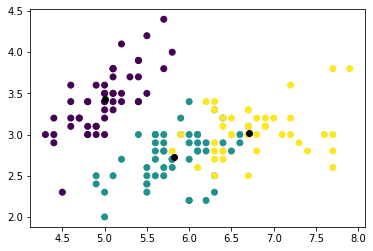

In [24]:
sorted_gs = np.argsort(gmm.means_[:, 0])
sorted_colors = list(range(n_components))
color_dict ={}
for i,g in enumerate(sorted_gs):
    color_dict[g] = sorted_colors[i]
c = np.array([color_dict[i] for i in labels])


plt.scatter(X[:,0],X[:,1],c = c)
plt.scatter(mu[:,0],mu[:,1],c='k')
plt.show()

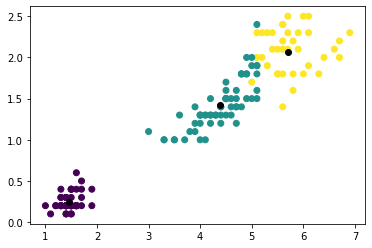

In [15]:
sorted_gs = np.argsort(gmm.means_[:, 3])
color_dict ={}
for i,g in enumerate(sorted_gs):
    color_dict[g] = sorted_colors[i]
c = np.array([color_dict[i] for i in labels])


plt.scatter(X[:,2],X[:,3],c = c)
plt.scatter(mu[:, 2], mu[:, 3],c= 'k')
plt.show()

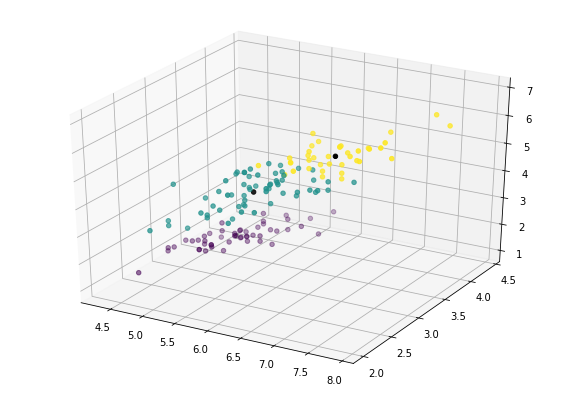

In [16]:
sorted_gs = np.argsort(gmm.means_[:, 0])
sorted_colors = list(range(n_components))
color_dict ={}
for i,g in enumerate(sorted_gs):
    color_dict[g] = sorted_colors[i]
c = np.array([color_dict[i] for i in labels])

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X[:,0], X[:,1], X[:,2], c=c)
ax.scatter3D(mu[:,0], mu[:,1], mu[:,2], c='k')
plt.show()

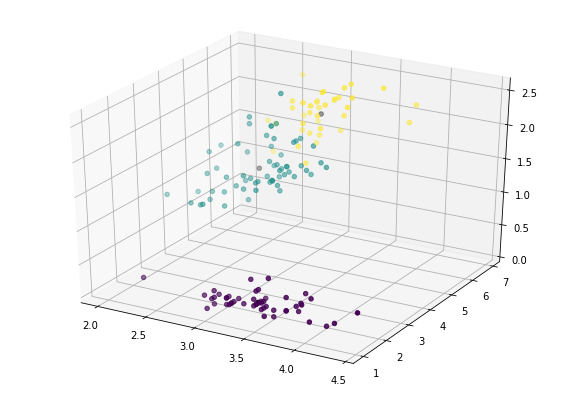

In [17]:
sorted_gs = np.argsort(gmm.means_[:, 0])
sorted_colors = list(range(n_components))
color_dict ={}
for i,g in enumerate(sorted_gs):
    color_dict[g] = sorted_colors[i]
c = np.array([color_dict[i] for i in labels])

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X[:,1], X[:,2], X[:,3], c=c)
ax.scatter3D(mu[:,1], mu[:,2], mu[:,3], c='k')
plt.show()